In [25]:
# Importando bibliotecas
import numpy as np
import os

In [26]:
os.chdir("C:\\Users\\acer\\Desktop\\vs_projects\\OMNP-Outspoken-Market-Na-Pratica\\Numpy\\data")

In [27]:
# Carregando arquivo
bitcoin = np.genfromtxt("BTCUSD_08092019.csv", delimiter=';')

# Para Salvar Arquivo
# np.savetxt("BTCUSD_08092019.csv", bitcoin, delimiter=";")

In [28]:
# Investigando Array
print("Shape: ", bitcoin.shape)
print("len: ", len(bitcoin))
print("ndim: ", bitcoin.ndim)
print("size: ", bitcoin.size)
print("dtype: ", bitcoin.dtype)

Shape:  (179,)
len:  179
ndim:  1
size:  179
dtype:  float64


In [29]:
# Operações dentro do Array

print("Soma de Todos os Elemento", bitcoin.sum())
print()

print("Valor Minimo de Todos os Elementos", bitcoin.min())
print()

print("Valor Máximo de Todos os Elementos", bitcoin.max())
print()

print("Valor Médio de Todos os Elementos", bitcoin.mean())
print()

print("Mediana de todos os Elementos: ", np.median(bitcoin))
print()

print("Desvio Padrão: ", np.std(bitcoin))

Soma de Todos os Elemento 1226613.2000000002

Valor Minimo de Todos os Elementos 3299.2

Valor Máximo de Todos os Elementos 12680.4

Valor Médio de Todos os Elementos 6852.5877094972075

Mediana de todos os Elementos:  5637.8

Desvio Padrão:  3019.8576481424543


In [30]:
# Comparações lógicas - voce pode usar qualquer um dos operadores logicos
bitcoin > bitcoin.mean()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [31]:
bitcoin > (bitcoin.mean() + np.std(bitcoin))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,

In [32]:
# Pegar apenas o Valores que atendem a condição
np.ma.masked_where(3600 <= bitcoin, bitcoin)

masked_array(data=[--, --, --, --, --, --, --, 3571.1, 3588.6, --, 3508.7,
                   3544.2, 3565.4, 3552.1, 3461.8, 3514.3, 3484.8, 3510.7,
                   3497.8, 3356.9, 3341.3, 3372.9, 3357.4, 3389.7, 3358.3,
                   3363.0, 3306.2, 3299.2, 3534.0, 3532.7, 3516.6, 3511.9,
                   3510.4, 3504.3, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, --, --, --, --, --, --, --, --,
                   --, --

In [33]:
# Mas para que serve tudo isso ?

In [34]:
def media_movel(seu_array, n = 5):
    valores = np.cumsum(seu_array, dtype=float)
    valores[n:] = valores[n:] - valores[:-n]
    return valores[n - 1:] / n

In [35]:
# Definição de periodos de Média Movel
periodos = 11

In [36]:
# Grafico da Analise de Risco 
%matplotlib inline

import matplotlib.pyplot as plt

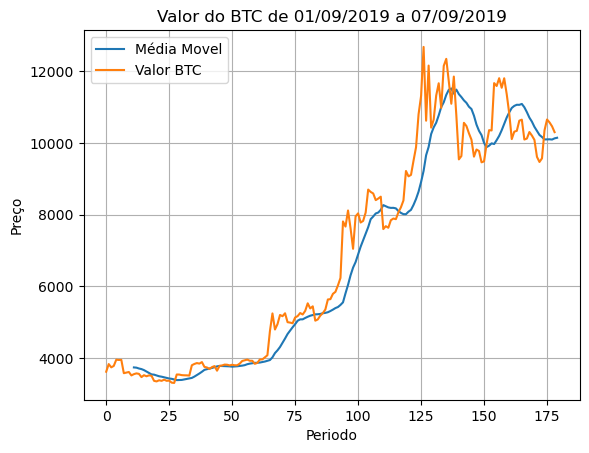

In [37]:
plt.plot(range(periodos, 
               periodos + len(media_movel(bitcoin, periodos)))
               , media_movel(bitcoin, periodos)
               , label= "Média Movel")
plt.plot(bitcoin, label = "Valor BTC")
plt.title('Valor do BTC de 01/09/2019 a 07/09/2019')
plt.xlabel("Periodo")
plt.ylabel("Preço")
plt.grid()
plt.legend()
plt.show()

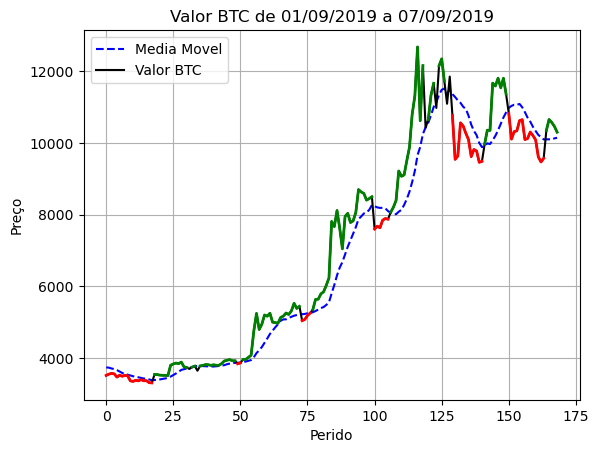

In [38]:
# Deixando o nosso Gráfico Mais Complexo

mm_btc = media_movel(bitcoin, periodos)

# ajustando o tamanho do grafico
plt.Figure(figsize=(20,10))

# Atributos
# Media Movel dos preçoes
plt.plot(mm_btc,
         'b--',
         label = "Media Movel")

# Preço do BTC
plt.plot(bitcoin[(periodos-1):],
         "black",
         label = "Valor BTC")

# Plot Condicional
bitcoin_under_mm = np.ma.masked_where(mm_btc <= bitcoin[10:], bitcoin[10:])
bitcoin_above_mm = np.ma.masked_where(mm_btc > bitcoin[10:], bitcoin[10:])

plt.plot(bitcoin_under_mm,
         'r',
         linewidth=2)

plt.plot(bitcoin_above_mm,
         'g',
         linewidth=2)

# Configs de Exibição
plt.title("Valor BTC de 01/09/2019 a 07/09/2019")
plt.xlabel("Perido")
plt.ylabel("Preço")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Fim